# Only consider "helpful" alters and focus on the alters who meet up with ego on at least 2 distinct co-locations

In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import meetup_strategy as ms
import time 
import pickle
import 

In [2]:
# read picle file
pickle_in = open("n_previous_placeidT.pickle", "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [18]:
meetup_details_uniq = pd.read_csv('n_previous_total_good_meetup_uniq.csv')
valid_meetup = meetup_details_uniq[meetup_details_uniq['unique_meetup'] > 1]

In [8]:
len(placeidT['laura-boychenko'])

1070

In [76]:
lenPlaceID = {key: [len(placeidT[key]), len(set(placeidT[key]['placeid'].tolist()))] for key in placeidT.keys()}

In [78]:
df_lenPlaceID = pd.DataFrame.from_dict(lenPlaceID,  orient='index', columns=['length', 'Uniq_length']).reset_index()
df_lenPlaceID.columns=['userid', 'length', 'Uniq_length']
df_lenPlaceID

,userid,length,Uniq_length
0,00-a,358,82
1,01,508,206
2,0403,208,121
3,08,3557,558
4,12,1075,103
...,...,...,...
10266,zsofia-cser,204,96
10267,zubin-irani,243,160
10268,zulfan-tm,1040,193
10269,zvi-band,239,111


##  Build a class and produce all results

In [40]:
ValidGoodMeetupCV = ms.MeetupCrossValid('data/weeplace_checkins.csv', mins_records=200, n_previous=200, 
                            user_meetup=None, total_meetup=valid_meetup, placeidT=placeidT)

In [42]:
start = time.time()
A = ValidGoodMeetupCV._ego_alter(ego='victor-nguyen-long')
time.time() - start

391.4974904060364

Let's focus on only 10 meetupers

In [44]:
start = time.time()
ValidGoodMeetupCV.ego_info(n_shown=10, verbose=True, filesave=True)
time.time() - start

['andrew-grill', 'enrico-gatti', 'kira', 'sha-hwang', 'brady-forrest', 'matt-ganzak', 'david-klein', 'fox-woods', 'unityan', 'rafael-rivera', 'jennifer-boyd', 'karen-monahan', 'brad-thompson', 'connie-k', 'orchid-liu', 'ernie-hsiung', 'some-inu', 'minsu-ju', 'maggie-liu', 'kenneth-auchenberg', 'butakao', 'michael-kantrow', 'richlocation', 'sheena-beaston', 'kevin-pfefferle', 'martin-thornkvist', 'suzy-chase-osborne', 'peter-cortez', 'geoff-kim', 'brad-benson', 'jp-kim', 'sean-mcdonald', 'toby-padilla', 'sandro-pigoni', 'nico-lumma', 'mtths', 'hugh', 'craig-pladson', 'moka-pantages', 'marla-mccormick', 'takeshi-yamamoto', 'sean-donovan', 'laura-boychenko', 'onepiece-chopper', 'prashant-agarwal', 'tim-geisenheimer', 'victor-nguyen-long', 'taylor-newby', 'dottie-guy']
andrew-grill
enrico-gatti
kira
sha-hwang
brady-forrest
matt-ganzak
david-klein
fox-woods
unityan
rafael-rivera
jennifer-boyd
karen-monahan
brad-thompson
connie-k
orchid-liu
ernie-hsiung
some-inu
minsu-ju
maggie-liu
kenneth-a

49691.29208803177

In [47]:
cross_info = ValidGoodMeetupCV.cross_info

In [85]:
cross_info['Pi_ego'] = cross_info['Pi_alters']/cross_info['Pi_alters_ratio']  

## Main idea and conclusion

In our previous experiments, we included alters one by one in the decreasing number of meetups. However, there always exists many alters with the same meetups and how to order them is a problem. Now I will investigate the order problem by achieving all the combinations.

Now we choose the egos with 10 meetupers, so for each ego, including 1 alters, there are $10 \choose 1$ cases, including 2 alters there are $10 \choose 2$ cases, $\cdots$ and including 10 alters, there are $10 \choose 10$ cases. I run all these experiments and check the full results.

* Conclusion 1: **including only 1 or 2 alters, how much predictability can be provided by alters depends on who you choose**. Choosing someone who is "useful" can provide much predictability while the "useless" can provide less predictability.
* Conclusion 2: **including 4 meetupers, no matter who you include, these alters can provide approximately 60% predictability as ego**, **including 7 meetupers, no matter who you include, these alters can provide approximately 70% predictability as ego**

## Visualisation

**Let's see a specific user 'kenneth-auchenberg'**

In [264]:
import visualization as vs

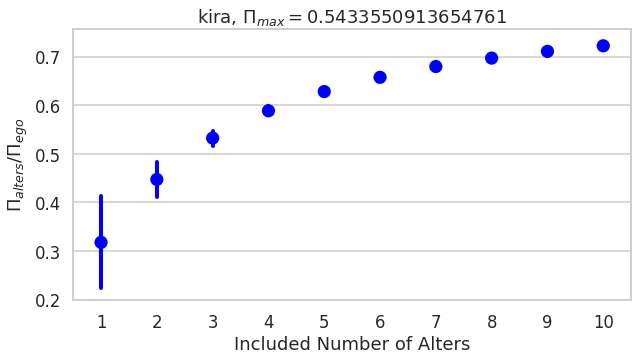

In [276]:
vs.cv_plot(cross_info[cross_info['userid'] == 'kira'], plot_type='errorbar', mode='talk', l=10, w=5)

In [277]:
cross_info[(cross_info['userid'] == 'kira') & (cross_info['Included'] ==1)]

,Included,alters_names,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,Pi_alters_ratio,Pi_ego_alters_ratio,userid,Pi_ego
0,1,'lacey-mclear',8.297367,4.955528,0.127600,0.553601,0.234837,1.018857,kira,0.543355
1,1,'johnny-hugel',7.328853,4.851977,0.269289,0.564829,0.495604,1.039521,kira,0.543355
2,1,'ron-villacarillo',7.672181,4.914536,0.221991,0.558056,0.408556,1.027055,kira,0.543355
3,1,'kwee',7.124036,4.949297,0.296463,0.554279,0.545616,1.020105,kira,0.543355
4,1,'patrick-simkins',7.776488,4.898973,0.207105,0.559743,0.381160,1.030161,kira,0.543355
5,1,'bryan-devasher',7.925857,5.026308,0.185281,0.545881,0.340995,1.004648,kira,0.543355
6,1,'arthur-rainey-baynes',8.554591,4.981856,0.083120,0.550734,0.152976,1.013580,kira,0.543355
7,1,'eva-schiave',8.612435,4.975188,0.072224,0.551461,0.132922,1.014918,kira,0.543355
8,1,'mac',8.761712,4.985478,0.041154,0.550339,0.075740,1.012853,kira,0.543355
9,1,'nicole-mcmullin',7.663600,4.918495,0.223204,0.557626,0.410788,1.026264,kira,0.543355


In [278]:
df_lenPlaceID[df_lenPlaceID['userid']=='kira']

,userid,length,Uniq_length
5618,kira,1683,472


**Let's see all the users**

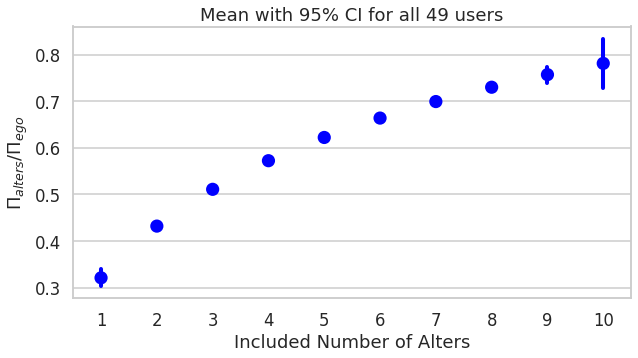

In [268]:
vs.cv_plot(cross_info, plot_type='errorbar', mode='talk', l=10, w=5)

In [115]:
# import operator
# from functools import reduce
# def c(n,k):
#     return  reduce(operator.mul, range(n - k + 1, n + 1)) /reduce(operator.mul, range(1, k +1))